<a href="https://colab.research.google.com/github/SadafShafi/Sadaf-Avatar/blob/main/FaceFormer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !ubuntu --version

/bin/bash: ubuntu: command not found


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
! chmod +x Miniconda3-latest-Linux-x86_64.sh
! bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')
     

In [2]:
!conda create -n facer python=3.7

Solving environment: \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/facer

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    ld_impl_linux-64-2.38      |       h1181459_1         654 KB
    libffi-3.4.2               |       h6a678d5_6         136 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1         474 KB
    libstdcxx-ng-11.2.0        |       h1234567_1         4.7 MB
    ncurse

In [4]:
%%bash
source activate facer 
conda env list 
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html
pip install torch==1.9.0
pip install ffmpeg 

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ## Start clean  
# !sudo apt purge nvidia*
# !sudo apt remove nvidia-*
# !sudo rm /etc/apt/sources.list.d/cuda*
# !sudo apt autoremove && apt autoclean
# !sudo rm -rf /usr/local/cuda*  

# ## Install some dependencies  
# !sudo apt install -y g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev  

# ## Add CUDA repository  
# !sudo add-apt-repository ppa:graphics-drivers/ppa
# !sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
# !echo "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64 /" | sudo tee /etc/apt/sources.list.d/cuda.list  

# ## Run update  
# !sudo apt update  

# ## Install Nvidia Driver 440  
# !sudo apt install -y nvidia-driver-440 

# ## Install CUDA-10.1  
# !sudo apt-get -o Dpkg::Options::="--force-overwrite" install cuda-10-1 cuda-drivers  

# ## Set CUDA paths  
# !echo 'export PATH=/usr/local/cuda-10.1/bin:$PATH' >> ~/.bashrc
# !echo 'export LD_LIBRARY_PATH=/usr/local/cuda-10.1/lib64:$LD_LIBRARY_PATH' >> ~/.bashrc
# !source ~/.bashrc
# !sudo ldconfig  

# !## Download Cudnn 7.6.5 for CUDa 10.1  
#   # - Go to https://developer.nvidia.com/cudnn  
#   # - Create an account  
#   # - Download the suitable version of Cudnn from https://developer.nvidia.com/rdp/cudnn-download  
#   # - Extract the downloaded file `tar -xzvf <filename>`  
#   # - Copy the following files into the CUDA directory  
# !sudo cp -P cuda/include/cudnn.h /usr/local/cuda-10.1/include
# !sudo cp -P cuda/lib64/libcudnn* /usr/local/cuda-10.1/lib64/
# !sudo chmod a+r /usr/local/cuda-10.1/lib64/libcudnn*

# ## Restart the PC  
# # !Restart your PC to apply the changes

# !## Check that everything went the right way  
# !nvidia-smi
# !nvcc -V

In [5]:
%%bash
source activate facer 
conda env list 

git clone https://github.com/EvelynFan/FaceFormer.git

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer



Cloning into 'FaceFormer'...


In [ ]:
ls

FaceFormer/  Miniconda3-latest-Linux-x86_64.sh*  sample_data/


In [7]:
%%bash 
source activate facer  
conda env list 
cd FaceFormer 
pip install -r requirements.txt 

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached scipy-1.7.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.5/635.5 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
%%bash
source activate facer 
conda env list 
pip install git+https://github.com/MPI-IS/mesh.git

In [ ]:
# !sudo apt-get update -y
# !sudo apt-get install python 3.7
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python 3.7

# !update-alternatives --install /usr/bin/python python /usr/bin/python 3.7
# !update-alternatives --list python
# !sudo update-alternatives --config python
# !sudo update-alternatives --set python /usr/bin/python 3.7
# !python3 --version

In [ ]:
# pip install torchtext

In [ ]:
ls

In [ ]:
# !pip install "torch>=1.1.0,<=1.7.1" torchvision==0.8.2 

In [ ]:
# %%bash
# source activate facer 
# conda env list 
# cd FaceFormer
#  python demo.py --model_name biwi --wav_path "demo/wav/test.wav" --dataset BIWI --vertice_dim 70110  --feature_dim 128 --period 25 --fps 25 --train_subjects "F2 F3 F4 M3 M4 M5" --test_subjects "F1 F5 F6 F7 F8 M1 M2 M6" --condition M3 --subject M1

In [ ]:
# %%bash
# source activate facer 
# conda env list 
# pip install PyOpenGL PyOpenGL_accelerate

In [9]:
%%bash
source activate facer 
conda env list 
sudo apt update
sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
sudo dpkg -i ./mesa_18.3.3-0.deb || true
sudo apt install -f

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,567 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://security.ubuntu.com/ubun



--2022-12-07 10:09:36--  https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmatl/travis_debs/master/xenial/mesa_18.3.3-0.deb [following]
--2022-12-07 10:09:36--  https://raw.githubusercontent.com/mmatl/travis_debs/master/xenial/mesa_18.3.3-0.deb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31776942 (30M) [application/octet-stream]
Saving to: ‘mesa_18.3.3-0.deb’

     0K .......... .......... .......... .......... ..........  0% 64.6M 0s
    50K .......... .......... .......... .......... ..........  0% 49.4M 1s
   100K .

In [10]:
%%bash
source activate facer 
conda env list 
conda install future

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/facer

  added / updated specs:
    - future


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    future-0.18.2              |           py37_1         631 KB
    ------------------------------------------------------------
                                           Total:         631 KB

The following NEW packages will be INSTALLED:

  future             pkgs/main/linux-64::future-0.18.2-py37_1


Proceed ([y]/n)? 

future-0.18.2        | 631 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [11]:
!gdown --id "1GUQBk9FqUimoT6UNgU0gyQnjGv-2_Lyp&confirm=t"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GUQBk9FqUimoT6UNgU0gyQnjGv-2_Lyp&confirm=t
To: /content/vocaset.pth
100% 386M/386M [00:06<00:00, 57.0MB/s]


In [12]:
!mv vocaset.pth /content/FaceFormer/vocaset/

In [13]:
!gdown --id "1WR1P25EE7Aj1nDZ4MeRsqdyGnGzmkbPX&confirm=t"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WR1P25EE7Aj1nDZ4MeRsqdyGnGzmkbPX&confirm=t
To: /content/biwi.pth
100% 451M/451M [00:07<00:00, 57.0MB/s]


In [14]:
!mv biwi.pth /content/FaceFormer/BIWI/

In [15]:
!gdown --id "1H4G7Pufw598xRLYDujqzOyGPXiNQQwZO&confirm=t"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H4G7Pufw598xRLYDujqzOyGPXiNQQwZO&confirm=t
To: /content/trainingdata.zip
100% 7.97G/7.97G [02:10<00:00, 61.1MB/s]


In [16]:
!mkdir trainingdata

In [17]:
!unzip trainingdata.zip -d trainingdata

Archive:  trainingdata.zip
  inflating: trainingdata/data_verts.npy  
  inflating: trainingdata/init_expression_basis.npy  
  inflating: trainingdata/processed_audio_deepspeech.pkl  
  inflating: trainingdata/raw_audio_fixed.pkl  
  inflating: trainingdata/readme.pdf  
  inflating: trainingdata/subj_seq_to_idx.pkl  
  inflating: trainingdata/templates.pkl  


In [18]:
!mv /content/trainingdata/* /content/FaceFormer/vocaset/

In [ ]:
# %%bash
# source activate facer 
# conda env list 
# pip install psutil

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 24.0 MB/s eta 0:00:00


In [19]:
%%bash
source activate facer 
conda env list 
cd FaceFormer
# pip install -r requirements.txt
pip install pyglet==1.4.10

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: pyglet
    Found existing installation: pyglet 2.0.1
    Uninstalling pyglet-2.0.1:
      Successfully uninstalled pyglet-2.0.1


In [ ]:
# data_verts.npy, raw_audio_fixed.pkl, templates.pkl and subj_seq_to_idx.pkl in the folder VOCASET. 
# "FLAME_sample.ply" from voca and put it in VOCASET/templates.

In [24]:
%%bash
source activate facer 
conda env list
pip uninstall pyopengl
y
git clone --recursive https://github.com/mmatl/pyopengl.git
pip install ./pyopengl

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./pyopengl
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.whl size=2349634 sha256=4188aa4033715786eb893322af15fc27583c05b6cd2b2ac6c7dedcb85ad2420f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wjzgzkoo/wheels/b9/95/f0/446ab1a3a98e9c9bf63d0103533b573b38449e08d52879c352
Successfully built PyOpenGL


Cloning into 'pyopengl'...


In [ ]:
# %%bash
# source activate facer 
# conda env list
# apt-get install \
#     libeigen3-dev \
#     libgmp-dev \
#     libgmpxx4ldbl \
#     libmpfr-dev \
#     libboost-dev \
#     libboost-thread-dev \
#     libtbb-dev \
#     python3-dev

In [43]:
# %%bash
# source activate facer 
# conda env list
# git clone https://github.com/PyMesh/PyMesh.git
# cd PyMesh
# git submodule update --init
# export PYMESH_PATH=`pwd`

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

Submodule path 'third_party/Clipper': checked out '3fd3457741d275b887ad16abacccbd01eda2175c'
Submodule path 'third_party/TetWild': checked out '5b0f81552fbd66c1ed66168fd7bbf222e3391816'
Submodule path 'third_party/WindingNumber': checked out 'e011b7bc9fa1e2570651097936ccf2314fdcbe86'
Submodule path 'third_party/carve': checked out 'd328ad2136a4fa6413db8ad264ed219095bb6744'
Submodule path 'third_party/cgal': checked out '1ce145a3c611df5f3a71fb20275b755fdbfca21e'
Submodule path 'third_party/cork': checked out '360820dd981fa72117f255ddaa68367419f7526c'
Submodule path 'third_party/draco': checked out '063994c362871d6f149c24c669122e4ef3fa8196'
Submodule path 'third_party/eigen': checked out 'ed3db99ec3caff039f72645b7c5feb68717c8655'
Submodule path 'third_party/fmt': checked out '355eb6d29ad7dbcb017420442af237e3cf6d8054'
Submodule path 'third_party/geogram': checked out '25228ad2a88b79

Cloning into 'PyMesh'...
Submodule 'third_party/Clipper' (https://github.com/PyMesh/Clipper.git) registered for path 'third_party/Clipper'
Submodule 'third_party/TetWild' (https://github.com/PyMesh/TetWild.git) registered for path 'third_party/TetWild'
Submodule 'third_party/WindingNumber' (https://github.com/PyMesh/WindingNumber.git) registered for path 'third_party/WindingNumber'
Submodule 'third_party/carve' (https://github.com/PyMesh/carve.git) registered for path 'third_party/carve'
Submodule 'third_party/cgal' (https://github.com/PyMesh/cgal.git) registered for path 'third_party/cgal'
Submodule 'third_party/cork' (https://github.com/PyMesh/cork.git) registered for path 'third_party/cork'
Submodule 'third_party/draco' (https://github.com/PyMesh/draco.git) registered for path 'third_party/draco'
Submodule 'third_party/eigen' (https://github.com/PyMesh/eigen.git) registered for path 'third_party/eigen'
Submodule 'third_party/fmt' (https://github.com/fmtlib/fmt.git) registered for pa

In [ ]:
%%bash
source activate facer 
conda env list
cd FaceFormer 
python demo.py  --model_name biwi --wav_path "demo/wav/test.wav" \
 --dataset BIWI --vertice_dim 70110  --feature_dim 128 --period 25 --fps 25 --train_subjects "F2 F3 F4 M3 M4 M5" \
 --test_subjects "F1 F5 F6 F7 F8 M1 M2 M6" --condition M3 --subject M1 
y

In [ ]:
# %%bash
# source activate facer 
# conda env list
# cd FaceFormer 

# python demo.py  \
# --model_name vocaset --wav_path "demo/wav/test.wav" --dataset vocaset \
# --vertice_dim 15069 --feature_dim 64 --period 30  --fps 30  \
# --train_subjects "FaceTalk_170728_03272_TA FaceTalk_170904_00128_TA FaceTalk_170725_00137_TA FaceTalk_170915_00223_TA FaceTalk_170811_03274_TA FaceTalk_170913_03279_TA FaceTalk_170904_03276_TA FaceTalk_170912_03278_TA" \
# --test_subjects "FaceTalk_170809_00138_TA FaceTalk_170731_00024_TA" --condition FaceTalk_170913_03279_TA \
# --subject FaceTalk_170809_00138_TA 

In [ ]:
# %rm  FaceTalk_170725_00137_TA_sentence11.npy

In [ ]:
# cd ../../..

/content


In [ ]:
pwd

'/content'

In [21]:

%%bash
source activate facer 
conda env list 
cd FaceFormer/vocaset
python process_voca_data.py

# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer



In [23]:
# import os
# files = os.listdir('FaceFormer/vocaset/vertices_npy')
# for file in files[13:]:
#     try:
#       # print(file)
#       os.remove('FaceFormer/vocaset/vertices_npy/'+file)
#     except:
#       pass

In [ ]:
ls  FaceFormer/vocaset/vertices_npy

In [ ]:
%%bash
source activate facer 
conda env list 
cd FaceFormer
python main.py --dataset vocaset --vertice_dim 15069 --feature_dim 64 \
--period 30 \
--train_subjects "FaceTalk_170728_03272_TA FaceTalk_170904_00128_TA FaceTalk_170725_00137_TA FaceTalk_170915_00223_TA FaceTalk_170811_03274_TA FaceTalk_170913_03279_TA FaceTalk_170904_03276_TA FaceTalk_170912_03278_TA" \
--val_subjects "FaceTalk_170811_03275_TA FaceTalk_170908_03277_TA" \
--test_subjects "FaceTalk_170809_00138_TA FaceTalk_170731_00024_TA"

In [34]:
%%bash
source activate facer 
conda env list 
cd FaceFormer
python render.py --dataset vocaset --vertice_dim 15069 --fps 30


# conda environments:
#
base                     /usr/local
facer                 *  /usr/local/envs/facer

rendering:  FaceTalk_170731_00024_TA_sentence23_condition_FaceTalk_170904_00128_TA.npy


Traceback (most recent call last):
  File "/usr/local/envs/facer/lib/python3.7/site-packages/psbody/mesh/serialization/serialization.py", line 433, in load_from_ply
    res = plyutils.read(filename)
plyutils.error: Failed to open PLY file.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "render.py", line 165, in <module>
    main()
  File "render.py", line 155, in main
    template = Mesh(filename=template_file)
  File "/usr/local/envs/facer/lib/python3.7/site-packages/psbody/mesh/mesh.py", line 67, in __init__
    self.load_from_file(filename)
  File "/usr/local/envs/facer/lib/python3.7/site-packages/psbody/mesh/mesh.py", line 461, in load_from_file
    serialization.load_from_file(self, filename)
  File "/usr/local/envs/facer/lib/python3.7/site-packages/psbody/mesh/serialization/serialization.py", line 412, in load_from_file
    self.load_from_ply(filename)
  File "/usr/local/envs/facer/lib/python3.7/site-packages/psbody

CalledProcessError: ignored

In [ ]:
# %%bash
# source activate facer 
# conda env list 
# cd FaceFormer
# python main.py --dataset vocaset \
# --vertice_dim 15069 --feature_dim 64 \
# --period 30 \
# --train_subjects "FaceTalk_170728_03272_TA FaceTalk_170904_00128_TA FaceTalk_170725_00137_TA FaceTalk_170915_00223_TA FaceTalk_170811_03274_TA FaceTalk_170913_03279_TA FaceTalk_170904_03276_TA FaceTalk_170912_03278_TA" \
# --val_subjects "FaceTalk_170811_03275_TA FaceTalk_170908_03277_TA" \
# --test_subjects "FaceTalk_170809_00138_TA FaceTalk_170731_00024_TA"


In [ ]:
# %%bash
# source activate facer 
# conda env list 
# cd FaceFormer/BIWI
# python process_voca_data.py

In [ ]:
 %%bash
source activate facer 
conda env list 
cd FaceFormer
 python main.py --dataset BIWI --vertice_dim 70110 \
 --feature_dim 128 --period 25 --train_subjects "F2 F3 F4 M3 M4 M5" \
 --val_subjects "F2 F3 F4 M3 M4 M5" --test_subjects "F1 F5 F6 F7 F8 M1 M2 M6"

In [33]:
 python render.py --dataset BIWI --vertice_dim 70110 --fps 25

SyntaxError: ignored

In [31]:
import numpy as np

img_array = np.load('/content/FaceFormer/vocaset/result/FaceTalk_170731_00024_TA_sentence23_condition_FaceTalk_170725_00137_TA.npy')

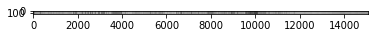

In [32]:
from matplotlib import pyplot as plt

plt.imshow(img_array, cmap='gray')
plt.show()